# Analisando os dados do Dataset

In [197]:
# Importando bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [198]:
# Carregar os dados e apresentar cabeçalho do df (DataFrame)
df = pd.read_csv('dataset_kaggle.com\Federal_Deposit_Insurance_Corporation_FDIC_Insured_Banks.csv', low_memory=False)

df.head()

,index,FID,ADDRESBR,BRNUM,BRSERTYP,CBSABR,CBSANAMB,CITYBR,CNTRYNAB,CNTYNAMB,...,STCNTY,STNAME,ZIP,BKMO,LOC_NAME,STATUS,SCORE,x,y,GeocodeSou
0,0,13001,950 Park Street,0,11,14460,"Boston-Cambridge-Newton, MA-NH",Stoughton,United States,Norfolk,...,25021,MASSACHUSETTS,2072,1,PointAddress,M,100,-71.073321,42.111569,HSIP USA_ZIP4 Composite
1,1,13002,97 Lowell Road,360,11,14460,"Boston-Cambridge-Newton, MA-NH",Concord,United States,Middlesex,...,44007,RHODE ISLAND,2903,0,PointAddress,M,100,-71.352231,42.463779,HSIP USA_ZIP4 Composite
2,2,13003,342 Main Street,0,11,14460,"Boston-Cambridge-Newton, MA-NH",Wakefield,United States,Middlesex,...,25017,MASSACHUSETTS,1880,1,PointAddress,M,100,-71.071241,42.504579,HSIP USA_ZIP4 Composite
3,3,13004,121 Main Street,0,11,12700,"Barnstable Town, MA",Yarmouth Port,United States,Barnstable,...,25001,MASSACHUSETTS,2675,1,StreetAddress,M,100,-70.252098,41.703698,HSIP USA_ZIP4 Composite
4,4,13005,205 Main St,0,11,0,,Frost,United States,Faribault,...,27043,MINNESOTA,56033,1,StreetAddress,M,100,-93.923821,43.584759,HSIP USA_ZIP4 Composite


In [199]:
# Criando uma lista com o nome de todas as colunas
columns_list = df.columns.tolist()

print(columns_list)

['index', 'FID', 'ADDRESBR', 'BRNUM', 'BRSERTYP', 'CBSABR', 'CBSANAMB', 'CITYBR', 'CNTRYNAB', 'CNTYNAMB', 'DEPSUMBR', 'GEOCODE_CE', 'GEOCODE__1', 'NAMEBR', 'STALPBR', 'STCNTYBR', 'STNAMEBR', 'UNINUMBR', 'ZIPBR', 'CERT', 'ADDRESS', 'ASSET', 'BKCLASS', 'CITY', 'CNTRYNA', 'DENOVO', 'DEPDOM', 'NAMEFULL', 'NAMEHCR', 'REGAGNT', 'REPDTE', 'RSSDID', 'STALP', 'STCNTY', 'STNAME', 'ZIP', 'BKMO', 'LOC_NAME', 'STATUS', 'SCORE', 'x', 'y', 'GeocodeSou']


In [200]:
# Verificando a quantidade de dados nulos presentes em todas as colunas
dados_null = df.isnull().sum().sum()

print(dados_null)

# Com base neste dado não há necessidade realizar a limpeza de dados nulos

0


In [201]:
# Criando uma cópia do DataFrame
df_copia = df.copy()

## Análise 1 - Concentração de mercado, analisando a participação de mercado de diferentes bancos

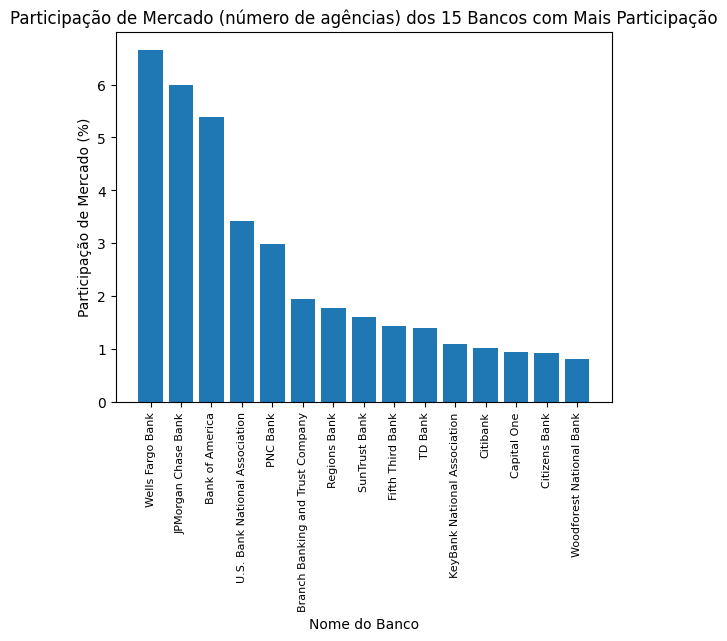

In [202]:
# Agrupando os bancos pelo nome, utilizando a coluna NAMEFULL
agrupando_bancos = df_copia.groupby('NAMEFULL').size()

# Calculando a participação de mercado de cada banco, considerando o número de agências
participacao_individual = agrupando_bancos / len(df_copia) * 100

# Convertendo a panda.Series em um DataFrame
participacao_individual_df = participacao_individual.to_frame()

# Renomeando a coluna criada para 'PART.INDI'
participacao_individual_df = participacao_individual_df.rename(columns={0: 'PART.INDI'})

# Convertendo o índice em uma coluna
participacao_individual_df = participacao_individual_df.reset_index()

# Renomeando a coluna do índice para 'NAMEFULL'
participacao_individual_df = participacao_individual_df.rename(columns={'index': 'NAMEFULL'})

# Ordenando os resultados pelo maior valor de participação de mercado
participacao_individual_df.sort_values(by='PART.INDI', ascending=False, inplace=True)

# A variável participacao_individual possui a lista completa de todos os bancos
# utilizando len(participacao_individual) é possível verificar que há 5746 registros
# Para facilitar a visualização trabalharemos com os 15 bancos com mais participação de mercado

# Selecionando os 15 bancos com mais participação de mercado
top_15 = participacao_individual_df.head(15)

# Reduzir nome dos bancos até a primeira vírgula (facilitar visualização dos dados)
top_15 = top_15.copy()
top_15['NAMEFULL'] = top_15['NAMEFULL'].str.split(',').str.get(0)

# Criando o gráfico de barras
plt.bar(top_15['NAMEFULL'], top_15['PART.INDI'])

# Adicionando os rótulos do eixo x na vertical
plt.xticks(rotation=90, fontsize=8)

# Adicionando títulos dos eixos x e y
plt.xlabel('Nome do Banco')
plt.ylabel('Participação de Mercado (%)')

# Adicionando título ao gráfico
plt.title('Participação de Mercado (número de agências) dos 15 Bancos com Mais Participação')

# Mostrando o gráfico
plt.show()


## Análise 2 - Ativos dos bancos por estado

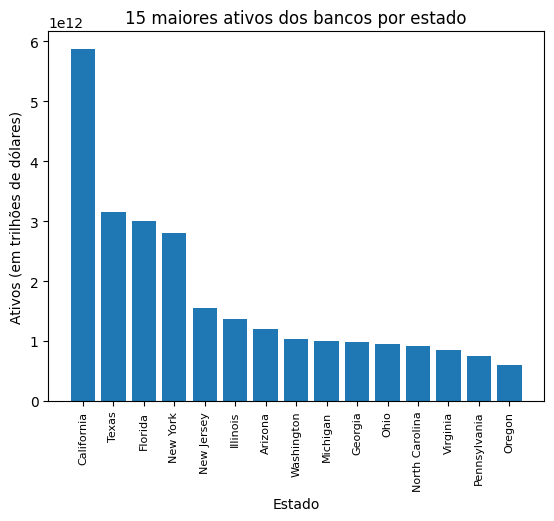

In [203]:
# Verificado que no dataset existem alguns países e ilhas agregadas aos EUA como, por exemplo, 
# American Samoa e Marshall Islands
# Para uma análise mais precisa utilizaremos somente os 50 estados oficiais pertencentes aos EUA

# Primeiramente utilizando a biblioteca 'us' disponível em https://pypi.org/project/us/ para criar uma lista de todos os estados

''' Código para importas dados da biblioteca US
from us import states
estados_oficiais = [state.name for state in states.STATES]    
'''

# Realizado de maneira externa para simplificar o código, não necessitando a instalação de outra biblioteca
estados_oficiais = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 
                    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 
                    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 
                    'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 
                    'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 
                    'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 
                    'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

# Limpando o DataFrame, utilizando os dados de 'STNAMEBR' que estão em 'estados_oficiais'
df_copia = df_copia[df_copia['STNAMEBR'].isin(estados_oficiais)]

# Agrupando os bancos pelo estado, utilizando a coluna STALPBR
bancos_por_estado = df_copia.groupby('STALPBR')

# Calcular a média dos ativos de cada estado
media_por_estado = bancos_por_estado['ASSET'].sum()

# Juntando 'informcaoes_por_estado' com 'media_por_estado'

informcaoes_por_estado = df_copia[['STALPBR', 'STNAMEBR']].drop_duplicates()
media_por_estado = pd.merge(media_por_estado, informcaoes_por_estado, on='STALPBR')

# Ordenando por ativos 
media_por_estado = media_por_estado.sort_values(by='ASSET', ascending=False)

# Criando um gráfico com os dados
# Para melhor visualização em formato gráfico, utilizamos somente os 15 maiores
# Exibindo somente os 15 maiores

top_15_estados = media_por_estado.head(15)

# Definido as barras do gráfico
plt.bar(top_15_estados['STNAMEBR'], top_15_estados['ASSET'])

plt.xticks(rotation=90, fontsize=8)

# Adicionando títulos dos eixos x e y
plt.xlabel('Estado')
plt.ylabel('Ativos (em trilhões de dólares)')

# Adiciona título ao gráfico
plt.title('15 maiores ativos dos bancos por estado')

# Exibe o gráfico
plt.show()

### Análise 2.1 - Comparando Ativos dos bancos com o PIB por estado

Fonte de dados PIB por estado, base 2021 

https://www.bea.gov/data/gdp/gdp-state


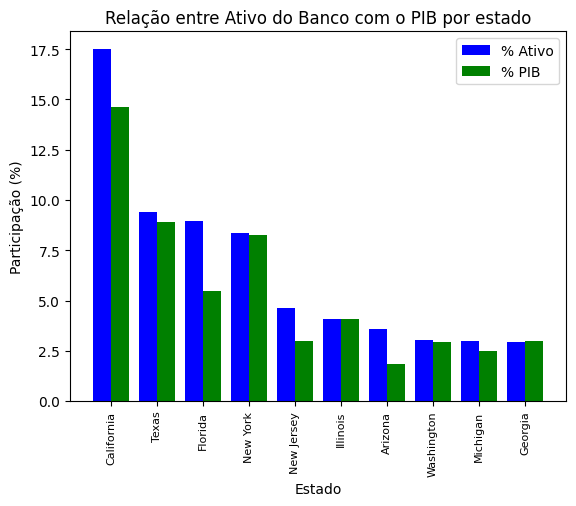

In [204]:
# Os dados podem ser adquiridos diretamente pela API do bea.gov, mas como são dados simples e 
# de fácil importação por csv foi optado por esta maneira
# Carregar os dados e apresentar cabeçalho do df (DataFrame)
df_gdp = pd.read_csv('Gross_Domestic_Product_by_State_2021.csv')

# Realizando a junção dos dados do dataset estadual com o valor do PIB por estado
juncao_ativos_com_pib = media_por_estado.merge(df_gdp, left_on='STNAMEBR', right_on='state')

# Excluindo a coluna 'state' do DataFrame gerado pela união
juncao_ativos_com_pib = juncao_ativos_com_pib.drop('state', axis=1)

# Somando valores das colunas Asset e gdp, para calcular o total. Criando as colunas 'ASSET_%' e '2021gdp_%'
# representam o valor em porcentagem do total para cada estado

juncao_ativos_com_pib['ASSET_%'] = juncao_ativos_com_pib['ASSET'].div(juncao_ativos_com_pib['ASSET'].sum()) * 100
juncao_ativos_com_pib['2021gdp_%'] = juncao_ativos_com_pib['2021gdp'].div(juncao_ativos_com_pib['2021gdp'].sum()) * 100

# Organizando o DataFrame pelo valor do ativo de cada estado

juncao_ativos_com_pib = juncao_ativos_com_pib.sort_values(by='ASSET', ascending=False)

# Criando um gráfico com os dados
# Para melhor visualização em formato gráfico, utilizamos somente os 10 maiores
# Exibindo somente os 10 maiores

# Configuração para apresentação de gráfico de barras agrupadas
x = np.arange(len(ativos_pib_top_10))
width = 0.40

# Definido as barras do gráfico
plt.bar(x-(width/2), ativos_pib_top_10['ASSET_%'], width, color='blue', label='% Ativo')
plt.bar(x+(width/2), ativos_pib_top_10['2021gdp_%'], width, color='green', label='% PIB')

# Obtendo nome dos estados pela coluna 'STNAMEBR'
lista_estados = ativos_pib_top_10['STNAMEBR']

# Definindo os rótulos do eixo x com os nomes dos estados
plt.xticks(x, lista_estados, rotation=90, fontsize=8)

# Adicionando um título
plt.title('Relação entre Ativo do Banco com o PIB por estado')

# Adicionando títulos dos eixos x e y
plt.xlabel('Estado')
plt.ylabel('Participação (%)')

# Adicionando as legendas das barras
plt.legend()

# Mostrando o gráfico
plt.show()